# Decision Trees:

- ## How to grow them? 🌳🌳🌳🌳

<br>

### What is a decision tree (DT)?

- #### An intuitive model that makes decisions based on a sequence of questions asked
- #### It is used to visually represent decisions

<br>
<br>


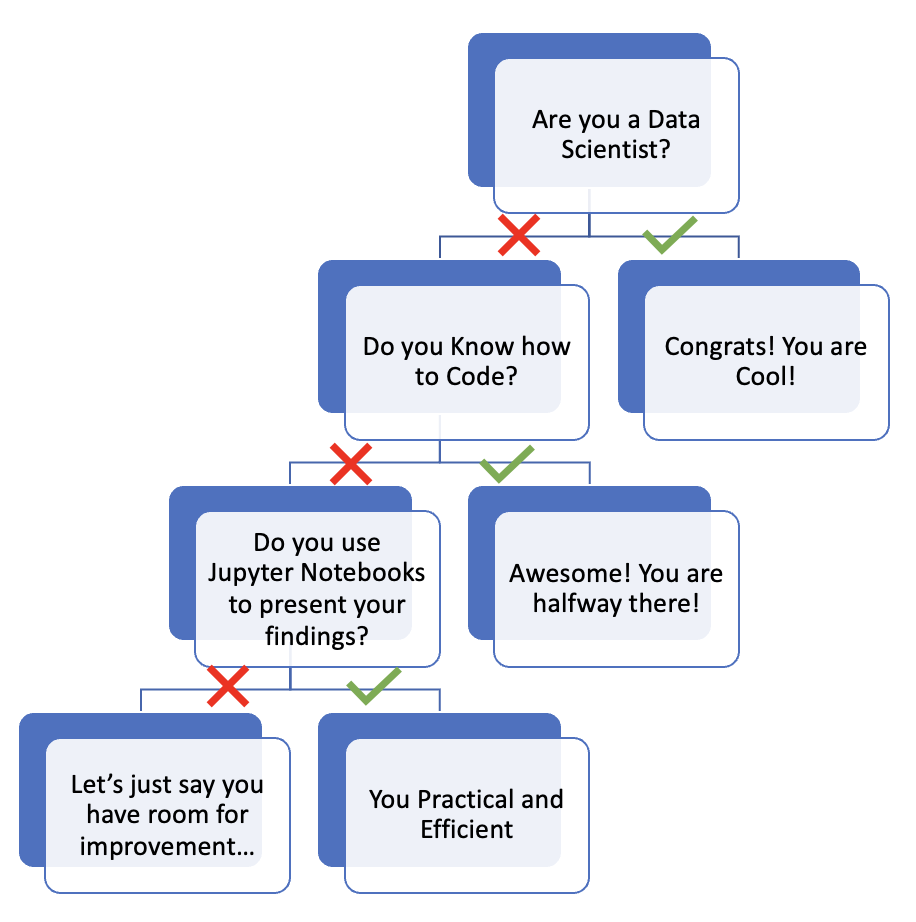

## Importnant Terminology:

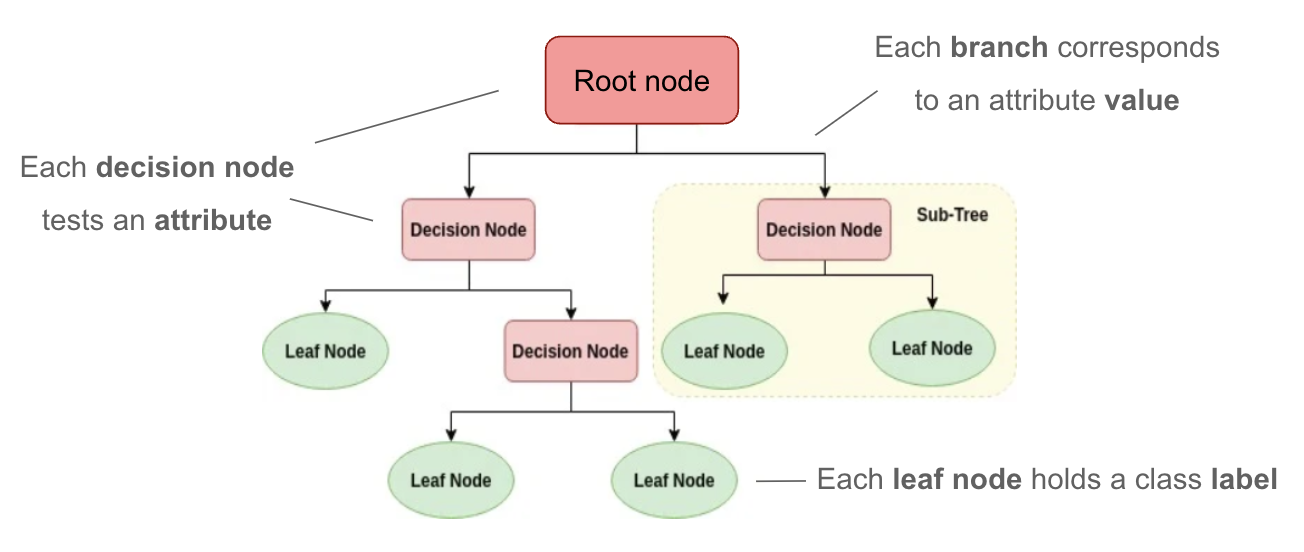

## There are two types of Decision Trees:

- ### If a decision tree clasify things into categories --> Classification Tree
- ### If a decision tree predicts numeric values --> Regression Tree

## Decision Trees Using Iris Datasets

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)

# Create a decision tree classifier with a maximum depth of 3
DTC = DecisionTreeClassifier(max_depth=3)

# Train the classifier on the training set
DTC.fit(X_train, y_train)

# Predict the target values for the testing set
y_pred = DTC.predict(X_test)

# Print the accuracy score of the classifier
print(f"Accuracy using score function: {DTC.score(X_test, y_test)*100}%")

Accuracy using score function: 95.55555555555556%


## Please do not run the following cell as it will provide an error.

Feel free to see the visualization of the tree though.

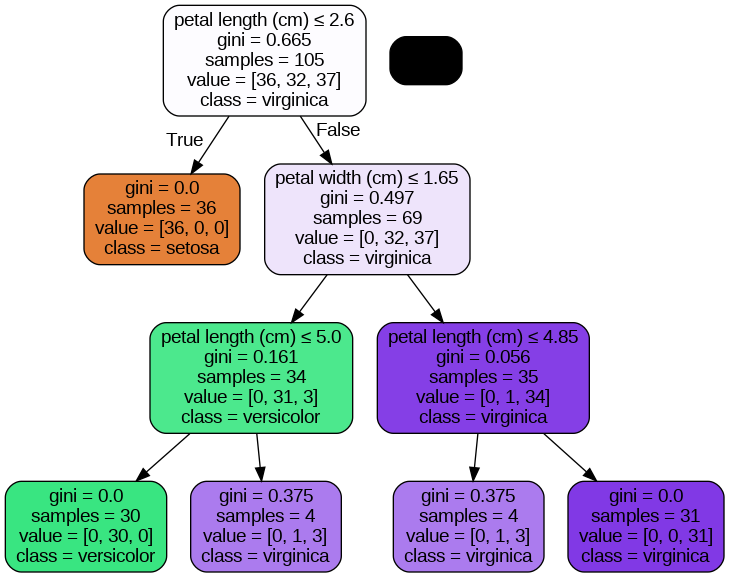

In [2]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Visualize the decision tree
dot_data = export_graphviz(DTC, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

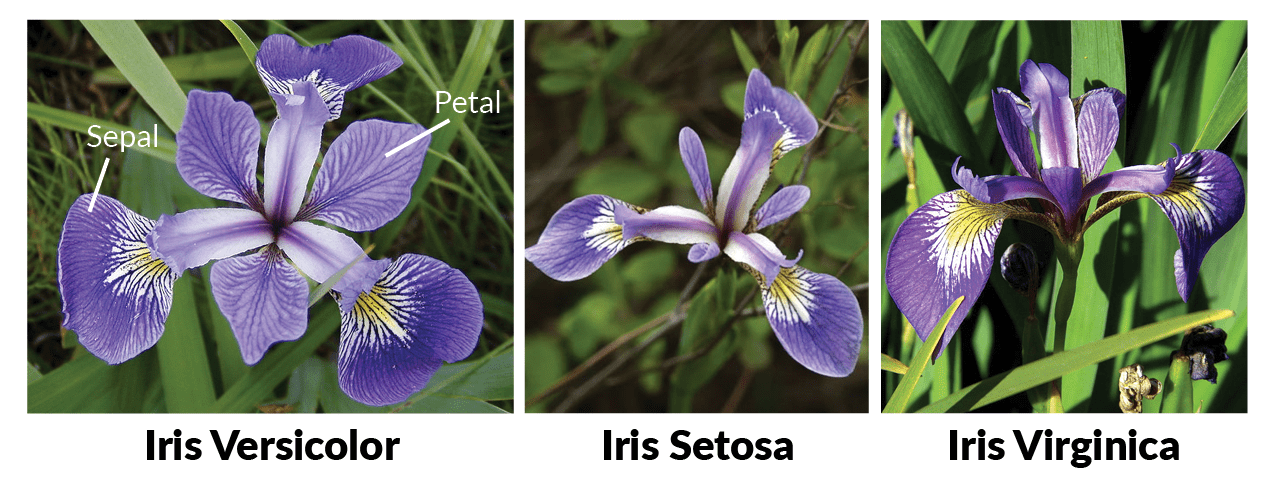

from [Iris Kaggle Dataset](https://www.kaggle.com/datasets/jeffheaton/iris-computer-vision)


## Regression Decision Tree using diabetes dataset

### First we do some EDA

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the DataFrame
df['target'] = diabetes.target

# Print the first few rows of the DataFrame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
# Generate summary statistics for the DataFrame
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


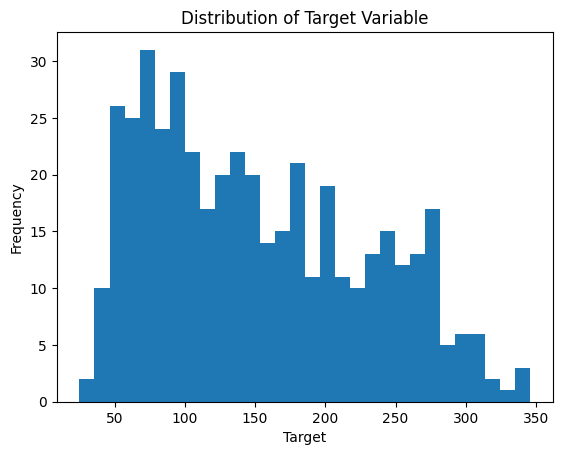

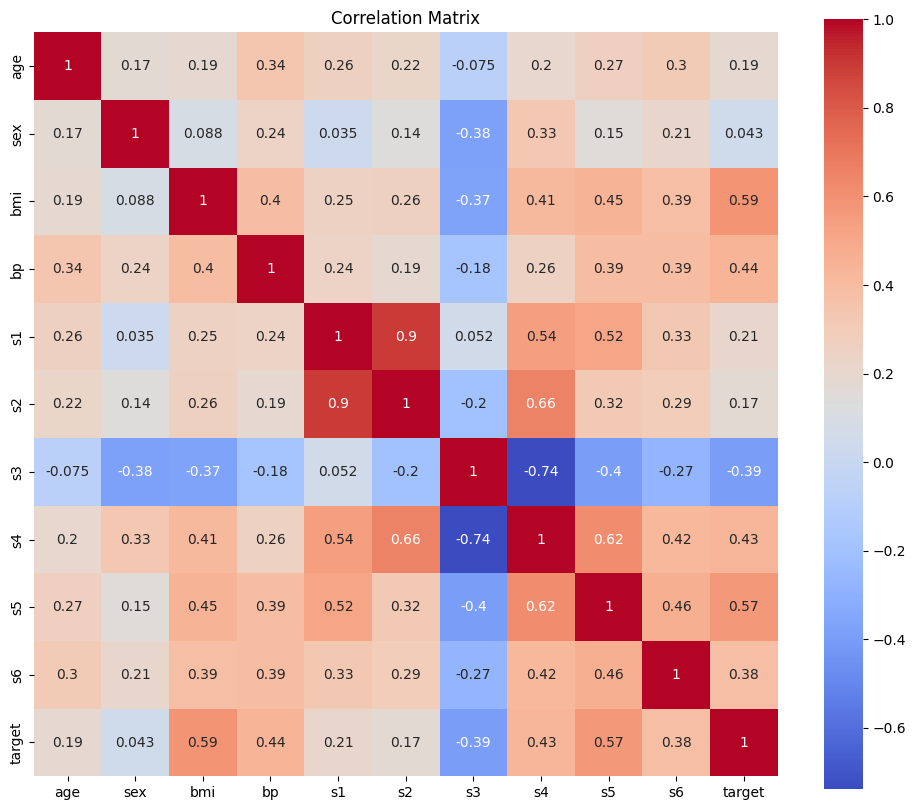

In [5]:
# Visualize the distribution of the target variable
plt.hist(df['target'], bins=30)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Model Building

In [6]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

# Create a decision tree regressor with a maximum depth of 3
DTR = DecisionTreeRegressor(max_depth=5)

# Train the regressor on the training set
DTR.fit(X_train, y_train)

# Predict the target values for the testing set
y_pred = DTR.predict(X_test)

# Print the mean squared error of the regressor
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 45.95942684663691


## Please do not run the following cell as it will provide an error.

Feel free to see the visualization of the tree though.

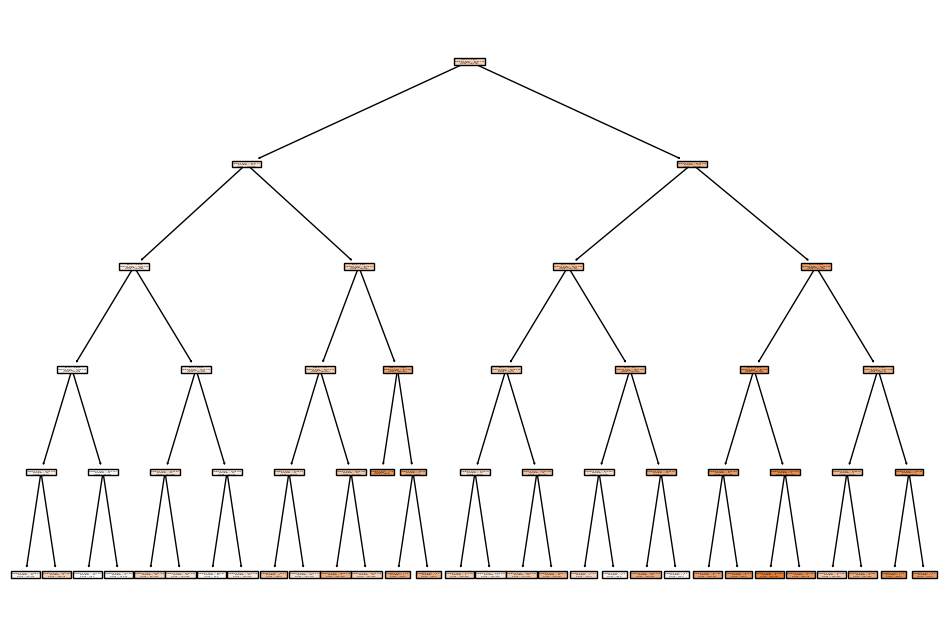

In [7]:
# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(DTR, filled=True, feature_names=diabetes.feature_names)
plt.show()